**Prénom :** Liza

**Nom :** HAMADENE

**Projet :** Reconnaissances des émotions.

**Description :**

Dans ce qui suit, on va développer un modèle de réseau de neuronnes convolutifs (CNN) pour une classification des émotions basé sur des images faciales afin de prédire sept catégories d'émotions à partir du dataset FER2013.csv.

**Définition du dataset :**
Le dataset fer2013.csv choisi se compose de trois colonnes:
- Colonne 'emotion' : elle contient 7 entiers (de 0 à 6) chacun représente une émotion, on a 0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'
- Colonne 'pixels' : chaine de pixels des images (représentée en une séquence de 2034 valeurs pour 48*48)
- Colonne 'Usage' : usage des images qui précise pourquoi on va utiliser l'image.

# **Importation des bibliothèques nécessaires :**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
import warnings

from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# **Prétraitement de données :**
### Dans cette partie du projet nous allons faire une préanalyse et prétraitement de données pour vérifier s'il n'y a pas d'anomalies afin de réaliser la classification.

## 1. Se connecter à google drive :
### On se connecte à drive afin de pouvoir avoir accés au différents fichiers de données dont on aura besoin dans ce projet.

In [ ]:
from google.colab import drive
import os

#monter Google Drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/FERecognition/data/raw/fer2013.csv"
outputfile="/content/drive/MyDrive/FERecognition/outputs/preprocesseddata.npz"
outputfile2 = "/content/drive/MyDrive/FERecognition/outputs/dataaugmentedfile.npz"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### dataset_path mene vers le dataset brute avant le prétraitement de données.
### et outputfile mene vers le fichier où on a stocké les données prétraitées.

## 2. Charger le fichier csv :

In [ ]:
data = pd.read_csv(dataset_path)


## 3. Partie prétraitement de données :
### dans ce qui suit, nous allons voir :
### -Un petit aperçu du dataset
### Visualisation de quelquesimages
### Visualiser la distribution des labes
### -Nettoyage de données, où nous allons vérifier si notre dataset ne contient pas de valeurs manquantes.
### -Normalisation de données numériques (pixels) en 0 et 1.
### -Encoage des labels, ici un label représente une classe d'émotion, on opte pour un encodage to_categorical qui est souvent utilisé dans des classifications multi-classes pour convertir les emotions (des entiers) en une représentation one-hot encoded. On m'utilise aussi car c'est compatible avec la fonction de perte utilisée (categorical_crossentropy) et il est aussi adapté au format attendu par la sortie de notre modèle (activation softmax).
### -Séparation les données selon la colonne 'Usage'.
### -Sauvegarde de données.

Aperçu des premieres lignes :
    emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

Aperçu des dernieres lignes :
        emotion                                             pixels        Usage
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

Les colonnes du dataset sont :

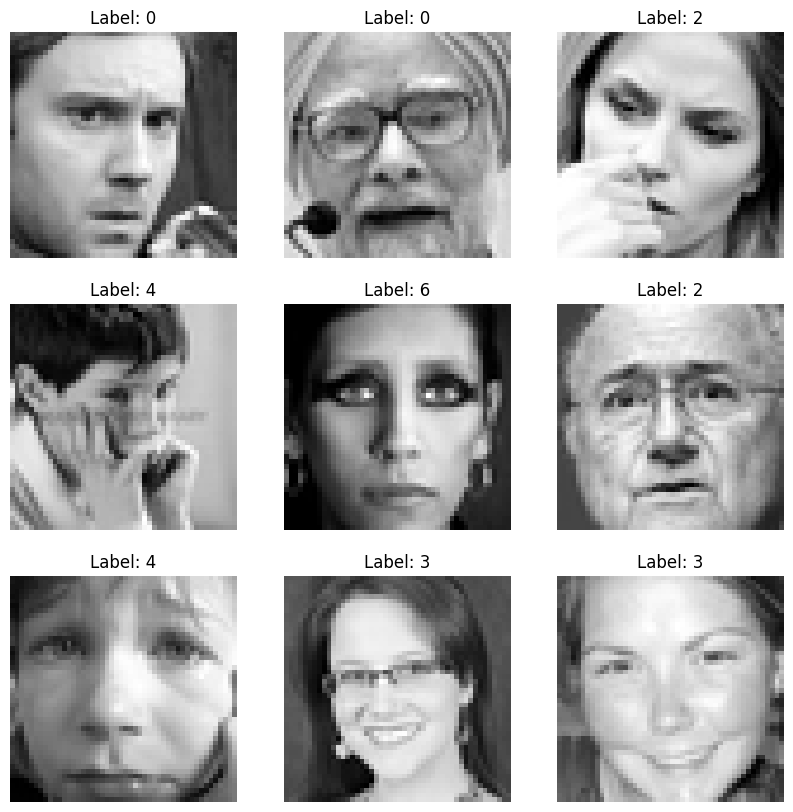

aucune valeur manquante détéctée

Proportion des classes de l'ensemble de train :
emotion
3    0.251315
6    0.172942
4    0.168240
2    0.142708
0    0.139155
5    0.110453
1    0.015187
Name: proportion, dtype: float64

Proportion des classes de l'ensemble validation :
emotion
3    0.249373
4    0.181945
6    0.169128
2    0.138200
0    0.130120
5    0.115631
1    0.015603
Name: proportion, dtype: float64

Proportion des classes de l'ensemble test:
emotion
3    0.244915
6    0.174422
4    0.165506
2    0.147116
0    0.136807
5    0.115910
1    0.015325
Name: proportion, dtype: float64


<ipython-input-72-91e27285a826>:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels, rotation=45)
<ipython-input-72-91e27285a826>:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels, rotation=45)
<ipython-input-72-91e27285a826>:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(labels, rotation=45)


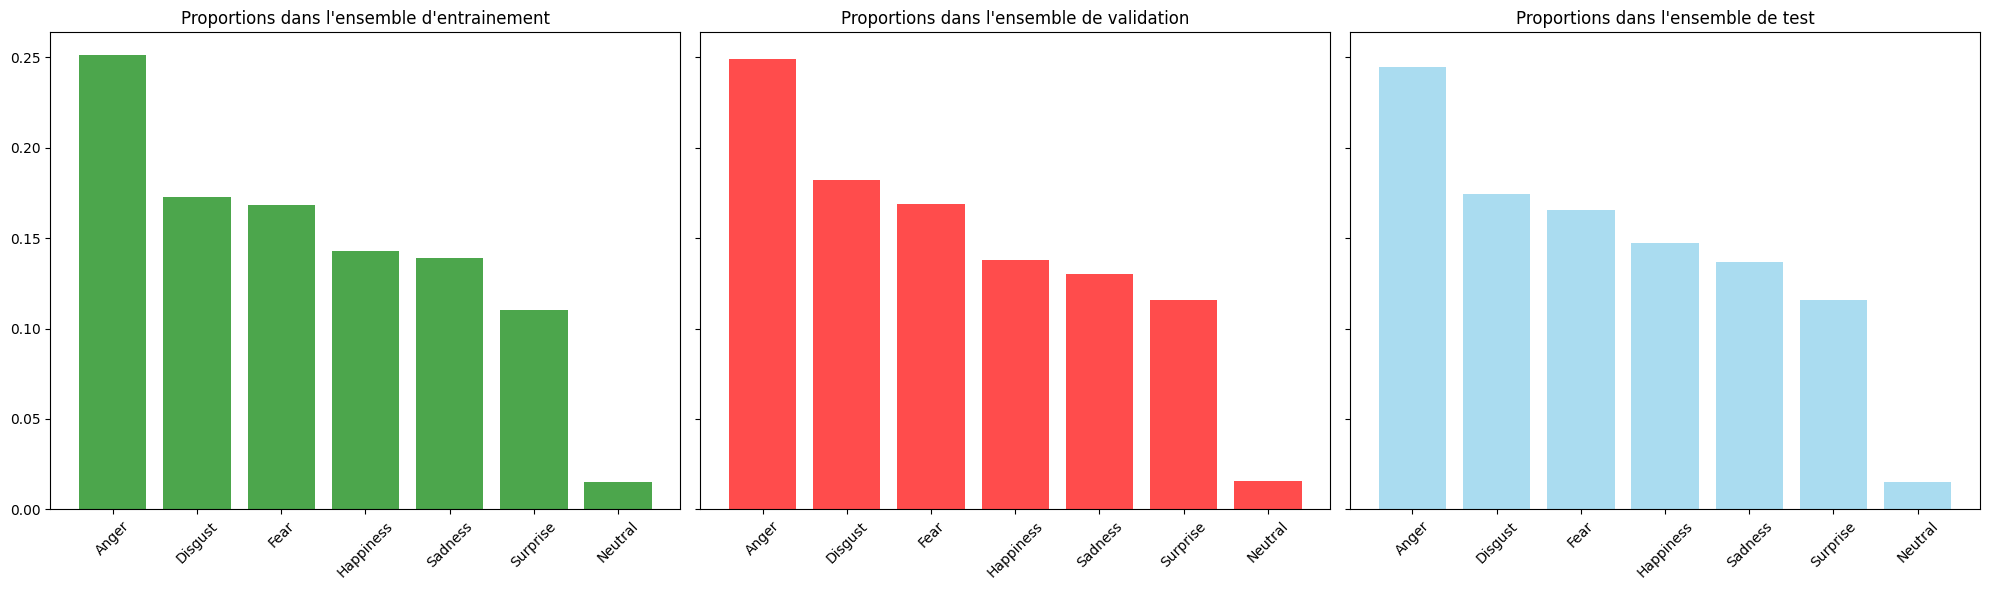

In [ ]:
"""
Aperçu général du dataset :
-Afficher les 5 premieres lignes du dataset
-Afficher les 5 dernieres lignes du dataset
-Afficher les colonnes du dataset
-Afficher les types des colonnes
-Afficher les dimensions du dataset
-Afficher les classes d'émotions
"""


print("Aperçu des premieres lignes :\n", data.head())
print("\nAperçu des dernieres lignes :\n", data.tail())
print("\nLes colonnes du dataset sont : \n", data.columns)
print("\nTypes des colonnes :\n", data.dtypes)
print("\nDimensions du dataset sont :\n", data.shape)
print("\nClasses d'émotions :\n")
print(data['emotion'].value_counts())

"""
Description statistique du dataset :
"""
print("\nDescription statistique du dataset :\n", data.describe())


"""
Visualiser quelques images (9) du dataset (pixels)
"""
plt.figure(figsize=(10, 10))
for i in range(9) :
  pixels = data['pixels'][i]
  vecteurPixels = np.array([int(p) for p in pixels.split()], dtype='uint8').reshape(48, 48)
  """
  Afficher les images dans une sous grille
  """
  plt.subplot(3, 3, i+1)
  plt.imshow(vecteurPixels, cmap='gray')
  plt.title(f"Label: {data['emotion'][i]}")
  plt.axis('off')
plt.show()




"""
Nettoyage de données :
-Vérifier s'il y a des données manquantes :
 Si oui, supprimer les lignes contenant des valeurs manquantes
"""
if data.isnull().sum().any() :
    print("données manquantes détéctées :\n", data.isnull().sum())
    data=data.dropna()
    print("données manquantes supprimmées")
else :
    print("aucune valeur manquante détéctée")


"""
Séparer les données

Diviser les données en données d'entrainement, validation et test
"""
train_data = data[data['Usage'] == 'Training']
val_data = data[data['Usage'] == 'PublicTest']
test_data = data[data['Usage'] == 'PrivateTest']

"""
Vérifier les proportions des ensembles et visualisation graphique
"""
print("\nProportion des classes de l\'ensemble de train :")
print(train_data['emotion'].value_counts(normalize=True))

print("\nProportion des classes de l\'ensemble validation :")
print(val_data['emotion'].value_counts(normalize=True))

print("\nProportion des classes de l\'ensemble test:")
print(test_data['emotion'].value_counts(normalize=True))

labels= ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
axes[0].bar( labels, train_data['emotion'].value_counts(normalize=True), color='green', alpha=0.7)
axes[0].set_title('Proportions dans l\'ensemble d\'entrainement')
axes[0].set_xticklabels(labels, rotation=45)

axes[1].bar( labels, val_data['emotion'].value_counts(normalize=True), color='red', alpha=0.7)
axes[1].set_title('Proportions dans l\'ensemble de validation')
axes[1].set_xticklabels(labels, rotation=45)

axes[2].bar( labels, test_data['emotion'].value_counts(normalize=True), color='skyblue', alpha=0.7)
axes[2].set_title('Proportions dans l\'ensemble de test')
axes[2].set_xticklabels(labels, rotation=45)

#ajuster l'espacement
plt.tight_layout()
plt.show()


### Dans la visualisation précedente de la distribution des émotions, on remarque que la distribution des données d'entrainement n'est pas homogène entre les différentes classes. Donc dans ce qui va suivre on va faire une augmentation de données pour les classes. Quant aux données de validation de test, il est déconseiller de les augmenter car elles doivent etre des valeurs réelles.

In [ ]:
"""
Normalisation de données numériques (pixels) entre 0 et 1
"""
print("normalisation de données d\'entrainement...")
X_train = np.array([np.array(pixels.split(), dtype='float32').reshape(48, 48, 1) /255.0 for pixels in train_data['pixels']])
y_train = train_data['emotion'].values

print("normalisation de données de validation...")
X_val = np.array([np.array(pixels.split(), dtype='float32').reshape(48, 48, 1) /255.0 for pixels in val_data['pixels']])
y_val = val_data['emotion'].values

print("normalisation de données de test...")
X_test = np.array([np.array(pixels.split(), dtype='float32').reshape(48, 48, 1) /255.0 for pixels in test_data['pixels']])
y_test = test_data['emotion'].values

"""
Encoder les labels (émotions)
"""
print("encodage des labels de l\'ensemble de train...")
y_train = to_categorical(y_train, num_classes=7)


print("encodage des labels de l\'ensemble de validation...")
y_val = to_categorical(y_val, num_classes=7)

print("encodage des labels de l\'ensemble de test...")
y_test = to_categorical(y_test, num_classes=7)



"""
Sauvegarder les données prétraitées
"""
print("sauvegarde de données prétraitées...")
np.savez_compressed(outputfile, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
print(f"Sauvegarde de données dans : {outputfile} avec succés!")

normalisation de données d'entrainement...
normalisation de données de validation...
normalisation de données de test...
encodage des labels de l'ensemble de train...
encodage des labels de l'ensemble de validation...
encodage des labels de l'ensemble de test...
sauvegarde de données prétraitées...
Sauvegarde de données dans : /content/drive/MyDrive/FERecognition/outputs/preprocesseddata.npz avec succés!


# **Augmentation de données :**

## 1. Charger les données prétraitées et vérifier la distribution des données d'entrainement :

In [ ]:
"""
Charger les données prétraitées :
 train_data
 test_data
"""
preprocesseddata = np.load(outputfile)
print("Charger les données d\'entrainement...")
X_train, y_train = preprocesseddata['X_train'], preprocesseddata['y_train']

print("Charger les données de validation...")
X_val, y_val = preprocesseddata['X_val'], preprocesseddata['y_val']


print("Charger les données de test...")
X_test, y_test= preprocesseddata['X_test'], preprocesseddata['y_test']


"""
Vérifier la distribution des données d'entrainement et de validation
"""
from collections import Counter
print("Distribution des classes d'\entrainement avant l'augmentation : ", Counter(np.argmax(y_train, axis=1)))


Charger les données d'entrainement...
Charger les données de validation...
Charger les données de test...
Distribution des classes d'\entrainement avant l'augmentation :  Counter({3: 7215, 6: 4965, 4: 4830, 2: 4097, 0: 3995, 5: 3171, 1: 436})


### On remarque que la classe 3 est la plus élevée et la classe 1 est celle qui a le moins de données.


## 2. Augmentation de données avec ImageDataGenerator :
### Dans ce qui suit, on augmente les données avec ImageDataGenerator de Keras
### -On crée un générateur d'images en générant des versions modifiées d'images d'entrainement en appliquant des transformation
### -On identifie les classes à augmenter
### -On augmente les données des classes minoritaires
### -On convertie en vecteur et on affiche les résultat
(IA utilisée)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

"""
Créer un générateur d'images :
 rescale : normalisation des valeurs des pixels entre 0 et 1
 rotation_range : une rotation aléatoire des images entre -20° et +20°
 width_shift_range : décalage horizontale des images jusqu'à 20% de largeur de l'image
 height_shift_range : décalage verticale des images jusqu'à 20% de la hauteur de l'image
 shear_range : modification de l'angle d'une image de manière non linéaire
 zoom_range : un zoom aléatoire sur les images avec une plage de zoom de 20% (agrandir ou réduire de 20%)
 horizontal_flip : effectuer une symétrie horizentale (flip) de l'image
 fill_mode : Remplir les pixels vides crées par les transformations avec les valeurs des pixels les plus proches
"""
train_data_generator= ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

"""
Trouver la taille de chaque classe et identifier celle qui est maximale
"""
class_counts = train_data['emotion'].value_counts()
max_count=class_counts.max()

"""
Augmenter les classes minoritaires
 -Identifier les classes à augmenter qui sont < à la classe majoritaire la plus haute
 -Extraire les données de ces classes
 -Préparer les données X et y pour ces classes
"""
classes_minoritaires = class_counts[class_counts < max_count].index
print(f"Les classes à augmenter sont : {classes_minoritaires}")

print("Extraction de données des classes minoritaires...\n")
data_min = train_data[train_data['emotion'].isin(classes_minoritaires)]

print("Préparation de données des classes minoritaires...\n")
X_min = np.array([np.array(pxs.split(), dtype='float32').reshape(48, 48, 1) for pxs in data_min['pixels']])
y_min = data_min['emotion'].values

X_train_augmente = []
y_train_augmente = []

for cle in classes_minoritaires:
  #filtrer les données
  classe_donnee = X_min[np.where(y_min == cle)]
  new_data_count = max_count - class_counts[cle] #combien de nouvelles données à générer

  #générer les données augmentées
  generer = train_data_generator.flow(classe_donnee, np.full((classe_donnee.shape[0], ), cle), batch_size=1)
  for _ in range(new_data_count):
    X, y = next(generer)
    X_train_augmente.append(X[0])
    y_train_augmente.append(y[0])

#convertir en numpy arrays
X_train_augmente = np.array(X_train_augmente)
y_train_augmente = np.array(y_train_augmente)

min_size = min(len(X_train_augmente), len(y_train_augmente))
X_train_augmente = X_train_augmente[:min_size]
y_train_augmente = y_train_augmente[:min_size]

y_train_augmente = to_categorical(y_train_augmente, num_classes=7)

#Combiner les données originales avec celles augmentées
X_train = np.concatenate([X_train, X_train_augmente], axis=0)
y_train = np.concatenate([y_train, y_train_augmente], axis=0)

print("Augmentation terminée avec succés!")
"""
Sauvegarder les données aprés augmentation
"""
print("sauvegarde de données aprés augmentation...")
np.savez_compressed(outputfile2, X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
print(f"Sauvegarde de données dans : {outputfile2} avec succés!")


Les classes à augmenter sont : Index([6, 4, 2, 0, 5, 1], dtype='int64', name='emotion')
Extraction de données des classes minoritaires...

Préparation de données des classes minoritaires...

Augmentation terminée avec succés!
sauvegarde de données aprés augmentation...
Sauvegarde de données dans : /content/drive/MyDrive/FERecognition/outputs/dataaugmentedfile.npz avec succés!


In [91]:
"""
Définition de l'architecture du modèle CNN
- Deux couches convolutionelle (extraire les caractéristiques)
- Deux couches de pooling
- Une couche Flatten
- Une couche dense dropout pour la régularisation
on fait une régularisation avec dropout et l2 pour éviter le surapprentissage
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.regularizers import l2
model = Sequential()

#1ere couche convolutionnelle
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01),input_shape=(48,48,1)))
#réduire la taille de l'image avec une 1ere couche de pooling
model.add(MaxPooling2D(2,2))

#2eme couche convolutionnelle
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
#réduire la taille de l'image avec une 2eme couche de pooling
model.add(MaxPooling2D(2,2))


#aplatir les caractèristiques extraites pour les rendre compatible avec les couches connectées (transformer en un 1D array)
model.add(Flatten())

#capturer les interactions complexes avec une couche connectée Dense
model.add(Dense(512, activation='relu'))

#réduire le surapprentissage en régularisant avec dropout
model.add(Dropout(0.5))

#derniere couche (de sortie) pour les probabilités
model.add(Dense(7, activation='softmax'))



In [ ]:
"""
Compiler le modèle
- adam : optimiseur adapté pour un réglage automatique du taux d'apprentissage
- categorical_crossentropy : Fonction de perte adaptée à une classification multi-classes
- accuracy : Métrique pour évaluer les performances
"""

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
"""
Afficher le résumé du modèle
"""
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,299,719 (12.59 MB)

 Trainable params: 3,299,719 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#entrainer le dataset
history = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 263s 925ms/step - accuracy: 0.2337 - loss: 2.0661 - val_accuracy: 0.3349 - val_loss: 1.7748
Epoch 2/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 262s 922ms/step - accuracy: 0.3286 - loss: 1.7689 - val_accuracy: 0.3293 - val_loss: 1.7770
Epoch 3/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 261s 919ms/step - accuracy: 0.3620 - loss: 1.6979 - val_accuracy: 0.4046 - val_loss: 1.5778
Epoch 4/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 258s 912ms/step - accuracy: 0.3889 - loss: 1.6441 - val_accuracy: 0.4352 - val_loss: 1.5374
Epoch 5/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 263s 917ms/step - accuracy: 0.4065 - loss: 1.5994 - val_accuracy: 0.4422 - val_loss: 1.5254
Epoch 6/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 261s 912ms/step - accuracy: 0.4183 - loss: 1.5722 - val_accuracy: 0.4620 - val_loss: 1.4507
Epoch 7/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 259s 914ms/step - accuracy: 0.4416 - loss: 1.5330 - val_accuracy: 0.4723 - val_loss: 1.4216
Epoch 8/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 262s 916ms/step - accuracy: 0.4499 -

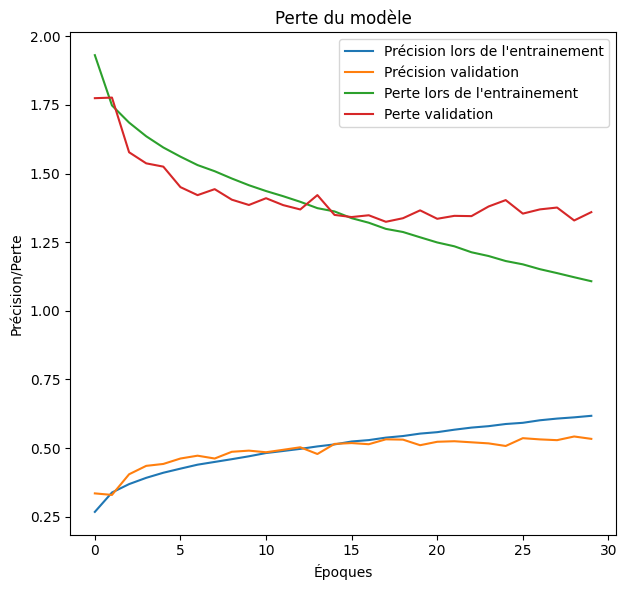

In [ ]:
"""
Afficher les métriques aprés l'entrainement du modèle
"""

plt.figure(figsize=(12, 6))

#Graphe de précision (accuracy)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Précision lors de l'entrainement")
plt.plot(history.history['val_accuracy'], label="Précision validation")
plt.title("Précision du modèle")
plt.xlabel('Époques')
plt.ylabel('Précision/Perte')
plt.legend()
plt.grid()

#Graphe de perte (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Perte lors de l'entrainement")
plt.plot(history.history['val_loss'], label="Perte validation")
plt.title("Perte du modèle")
plt.xlabel('Époques')
plt.ylabel('Précision/Perte')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Interpretation des résultats de l'accuracy et loss lors de l'entrainement et validation :
### Perte : on remarque que la perte de l'entrainement et validation  diminuent progressivement.
### Précision : on remarque que la précision d'entrainement et de validation  augmentent aussi progressivement.
### Ce qui veut dire que le modèle apprend correctement et généralise bien aux données de validation.

# Évaluation du modèle sur l'ensemble de test :

In [ ]:
"""
Évaluer le modèle sur l'ensemble de test
"""
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte sur l'ensemble de test : {loss}")
print(f"Précision sur l'ensemble de test : {accuracy}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5511 - loss: 1.3244
Perte sur l'ensemble de test : 1.340912938117981
Précision sur l'ensemble de test : 0.5477849245071411


## Interpreter les résultats de test :
### On a une précision de 54.78% qui signifie que mon modèle classe correctement 54.78% des images dans l'ensemble de test qui est peu.
### La perte est de 1.34 qui signifie que les prédictions du modèle sont encore éloignées de vraies valeurs.
### Cela peut etre du à un sur-apprentissage vu que les valeuuuuuuurs d'accuracy sont élevées par rapport à ce résultat de test.
### On peut utiliser un modèle pré-entrainé tel que VGG16

## Matrice de confusion :

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step


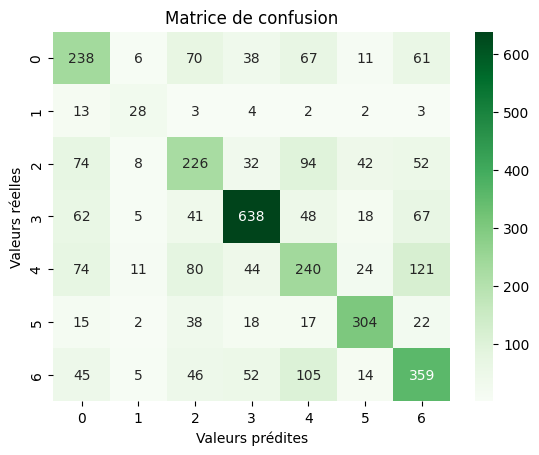

In [ ]:
"""
Générer des métriques
 -Matrice de confusion pour identifier les classes mal prédites
"""

#Prédictions
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

from sklearn.metrics import confusion_matrix
#Matrice de confusion
matrix = confusion_matrix(y_true, y_pred_class)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Matrice de confusion")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()